<a href="https://colab.research.google.com/github/Faizanealiqazi/TSP_CUCKOO_SEARCH/blob/main/NIIA_PROJECT_EFFECTS_OF_POPULATION_ON_CUCKOO_SEARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.cm import get_cmap

In [3]:
"""
Possible Lévy distribution
Mantegna's Algorithm // Currently applied
Inverse Transform Sampling
Chambers-Mallows-Stuck Method (CMS)
Series Expansion
Monte Carlo Simulation
Fourier Transform Sampling
Rejection Sampling
"""

"\nPossible Lévy distribution\nMantegna's Algorithm // Currently applied\nInverse Transform Sampling\nChambers-Mallows-Stuck Method (CMS)\nSeries Expansion\nMonte Carlo Simulation\nFourier Transform Sampling\nRejection Sampling\n"

In [5]:
"""
Initialize population with random tours
Evaluate the fitness of each tour

for each generation do
    Generate a new tour by Lévy flight from an existing tour
    Evaluate its fitness
    Choose a random nest (tour) from the population
    if the fitness of the new tour is better than the chosen nest then
        Replace the chosen nest with the new tour
    end if
    Abandon a fraction pa of the worst nests and generate new ones
    Keep the best tour found so far
end for

Return the best tour
"""

'\nInitialize population with random tours\nEvaluate the fitness of each tour\n\nfor each generation do\n    Generate a new tour by Lévy flight from an existing tour\n    Evaluate its fitness\n    Choose a random nest (tour) from the population\n    if the fitness of the new tour is better than the chosen nest then\n        Replace the chosen nest with the new tour\n    end if\n    Abandon a fraction pa of the worst nests and generate new ones\n    Keep the best tour found so far\nend for\n\nReturn the best tour\n'

In [16]:
# 1 Sphere Function
def sphere(x):
    return sum([xi**2 for xi in x])

# 2 Rastrigin Function
def rastrigin(x):
    return 10 * len(x) + sum([(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])

# 3 Ackley Function
def ackley(x):
    a, b, c = 20, 0.2, 2 * np.pi
    sum_sq_term = -a * np.exp(-b * np.sqrt(sum([xi**2 for xi in x]) / len(x)))
    cos_term = -np.exp(sum([np.cos(c * xi) for xi in x]) / len(x))
    return a + np.exp(1) + sum_sq_term + cos_term

# 4 Rosenbrock Function
def rosenbrock(x):
    return sum([100 * (x[i+1] - x[i]**2)**2 + (x[i] - 1)**2 for i in range(len(x)-1)])

# 5 Griewank Function
def griewank(x):
    part1 = sum([xi**2 / 4000 for xi in x])
    part2 = np.prod([np.cos(xi / np.sqrt(i+1)) for i, xi in enumerate(x)])
    return 1 + part1 - part2

# 6 Levy Function
def levy(x):
    w = 1 + (np.array(x) - 1) / 4
    term1 = np.sin(np.pi * w[0])**2
    term3 = (w[-1] - 1)**2 * (1 + np.sin(2 * np.pi * w[-1])**2)
    sum_terms = sum([(wi - 1)**2 * (1 + 10 * np.sin(np.pi * wi + 1)**2) for wi in w[:-1]])
    return term1 + sum_terms + term3

# 7 Schwefel Function
def schwefel(x):
    return 418.9829 * len(x) - sum([xi * np.sin(np.sqrt(abs(xi))) for xi in x])

# 8 De Jong's Function
def de_jong(x):
    return sum([xi**2 for xi in x])

# 9 Himmelblau's Function
def himmelblau(x):
    x, y = x[0], x[1]
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# 10 Easom Function
def easom(x):
    x, y = x[0], x[1]
    return -np.cos(x) * np.cos(y) * np.exp(-(x - np.pi)**2 - (y - np.pi)**2)

# 11 Michalewicz Function
def michalewicz(x, m=10):
    return -sum([np.sin(xi) * np.sin((i + 1) * xi**2 / np.pi)**(2 * m) for i, xi in enumerate(x)])

# 12 Beale's Function
def beale(x):
    x1, x2 = x[0], x[1]
    return (1.5 - x1 + x1 * x2)**2 + (2.25 - x1 + x1 * x2**2)**2 + (2.625 - x1 + x1 * x2**3)**2

# 13 Goldstein-Price Function
def goldstein_price(x):
    x1, x2 = x[0], x[1]
    return (1 + (x1 + x2 + 1)**2 * (19 - 14 * x1 + 3 * x1**2 - 14 * x2 + 6 * x1 * x2 + 3 * x2**2)) * \
           (30 + (2 * x1 - 3 * x2)**2 * (18 - 32 * x1 + 12 * x1**2 + 48 * x2 - 36 * x1 * x2 + 27 * x2**2))

# 14 Booth's Function
def booth(x):
    x1, x2 = x[0], x[1]
    return (x1 + 2 * x2 - 7)**2 + (2 * x1 + x2 - 5)**2

# 15 Bukin Function N.6
def bukin(x):
    x1, x2 = x[0], x[1]
    return 100 * np.sqrt(abs(x2 - 0.01 * x1**2)) + 0.01 * abs(x1 + 10)

# 16 Matyas Function
def matyas(x):
    x1, x2 = x[0], x[1]
    return 0.26 * (x1**2 + x2**2) - 0.48 * x1 * x2

# 17 Three-hump Camel Function
def three_hump_camel(x):
    x1, x2 = x[0], x[1]
    return 2 * x1**2 - 1.05 * x1**4 + (x1**6 / 6) + x1 * x2 + x2**2

# 18 Six-hump Camel Function
def six_hump_camel(x):
    x1, x2 = x[0], x[1]
    return (4 - 2.1 * x1**2 + (x1**4 / 3)) * x1**2 + x1 * x2 + (-4 + 4 * x2**2) * x2**2

# 19 Cross-in-Tray Function
def cross_in_tray(x):
    try:
        x1, x2 = x[0], x[1]
        term = np.abs(100 - np.sqrt(x1**2 + x2**2) / np.pi)
        return -0.0001 * (np.abs(np.sin(x1) * np.sin(x2) * np.exp(term)) + 1)**0.1
    except FloatingPointError:
        return np.inf

# 20 Eggholder Function
def eggholder(x):
    x1, x2 = x[0], x[1]
    return -(x2 + 47) * np.sin(np.sqrt(abs(x2 + x1 / 2 + 47))) - x1 * np.sin(np.sqrt(abs(x1 - (x2 + 47))))

In [17]:
# Benchmark function wrapper
benchmark_functions = {
    "sphere": sphere,
    "rastrigin": rastrigin,
    "ackley": ackley,
    "rosenbrock": rosenbrock,
    "griewank": griewank,
    "levy": levy,
    "schwefel": schwefel,
    "de_jong": de_jong,
    "himmelblau": himmelblau,
    "easom": easom,
    "michalewicz": michalewicz,
    "beale": beale,
    "goldstein_price": goldstein_price,
    "booth": booth,
    "bukin": bukin,
    "matyas": matyas,
    "three_hump_camel": three_hump_camel,
    "six_hump_camel": six_hump_camel,
    "cross_in_tray": cross_in_tray,
    "eggholder": eggholder
}

In [36]:
# Function to plot convergence rates and results for different population sizes
def plot_results_and_convergence(results, convergence_rates, population_sizes):
    num_plots = len(results)
    plt.figure(figsize=(15, num_plots * 10))

    for i, benchmark_name in enumerate(results.keys(), 1):
        # Plot Average Fitness
        plt.subplot(num_plots, 2, 2*i-1)
        plt.plot(population_sizes, results[benchmark_name], marker='o', color='green')
        plt.title(f'{benchmark_name} Function Performance')
        plt.xlabel('Population Size')
        plt.ylabel('Average Fitness')
        plt.grid(True)

        # Plot Convergence Rate
        plt.subplot(num_plots, 2, 2*i)
        for size in population_sizes:
            plt.plot(convergence_rates[benchmark_name][size], label=f'Pop size {size}', color='red')
        plt.title(f'Convergence Rate for {benchmark_name}')
        plt.xlabel('Iteration')
        plt.ylabel('Best Fitness')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()


# Function to run cuckoo
def cuckoo_search(nodes, n, max_iter, pa, beta, benchmark_function):

    nests = [np.random.uniform(low=-10, high=10, size=nodes) for _ in range(n)]

    fitness = np.array([benchmark_function(nest) for nest in nests])
    best_nest = None
    best_fitness = float('inf')
    fitness_history = []  # To track fitness over iterations

    for iteration in range(max_iter):
        for i in range(n):
            new_nest = np.copy(nests[i])
            step_size = levy_flight(beta, size=nodes)
            new_nest += step_size
            fnew = benchmark_function(new_nest)

            if fnew < fitness[i]:
                nests[i] = new_nest
                fitness[i] = fnew

                if fnew < best_fitness:
                    best_nest = new_nest
                    best_fitness = fnew

        fitness_history.append(best_fitness)  # Track best fitness in this iteration

        # Abandon nests
        for idx in range(n):
            if np.random.rand() < pa:
                nests[idx] = np.random.uniform(low=-10, high=10, size=nodes)
                fitness[idx] = benchmark_function(nests[idx])

    return best_nest, best_fitness, fitness_history



# Function to run over multiple benchmark functions and population sizes
def run_benchmark_tests(benchmark_functions, population_sizes, num_runs, max_iter, pa, beta=1.5, dimensions=2):
    results = {}
    convergence_rates = {}
    for name, func in benchmark_functions.items():
        results[name] = []
        convergence_rates[name] = {}
        for size in population_sizes:
            fitness_values = []
            convergence = []
            for _ in range(num_runs):
                _, fitness, history = cuckoo_search(dimensions, size, max_iter, pa, beta, func)
                fitness_values.append(fitness)
                convergence.append(history)
            average_fitness = np.mean(fitness_values)
            results[name].append(average_fitness)

            # Calculate average convergence rate across runs
            avg_convergence = np.mean(convergence, axis=0)
            convergence_rates[name][size] = avg_convergence

            print(f"Population Size: {size}, Average Fitness for {name}: {average_fitness}\n")

    return results, convergence_rates


# Example usage
population_sizes = [20, 40, 60, 80, 100]
num_runs = 15
max_iter = 1000
pa = 0.25

Population Size: 20, Average Fitness for sphere: 0.0021787323553401016

Population Size: 40, Average Fitness for sphere: 0.0011192658526383147

Population Size: 60, Average Fitness for sphere: 0.0006244041101963934

Population Size: 80, Average Fitness for sphere: 0.0003940430628340135

Population Size: 100, Average Fitness for sphere: 0.0003839614956015113

Population Size: 20, Average Fitness for rastrigin: 0.7098522543729537

Population Size: 40, Average Fitness for rastrigin: 0.27909966053471985

Population Size: 60, Average Fitness for rastrigin: 0.2505107857600031

Population Size: 80, Average Fitness for rastrigin: 0.21995087226064763

Population Size: 100, Average Fitness for rastrigin: 0.1529591399629839

Population Size: 20, Average Fitness for ackley: 0.20772495231619542

Population Size: 40, Average Fitness for ackley: 0.0970936316267783

Population Size: 60, Average Fitness for ackley: 0.08029368523313124

Population Size: 80, Average Fitness for ackley: 0.0750607144690249

<ipython-input-16-b02d6ab0ef61>:97: RuntimeWarning: overflow encountered in exp
  return -0.0001 * (np.abs(np.sin(x1) * np.sin(x2) * np.exp(term)) + 1)**0.1


Population Size: 20, Average Fitness for cross_in_tray: -inf

Population Size: 40, Average Fitness for cross_in_tray: -inf

Population Size: 60, Average Fitness for cross_in_tray: -inf

Population Size: 80, Average Fitness for cross_in_tray: -inf

Population Size: 100, Average Fitness for cross_in_tray: -inf

Population Size: 20, Average Fitness for eggholder: -396.74958886847776

Population Size: 40, Average Fitness for eggholder: -921.6727526915092

Population Size: 60, Average Fitness for eggholder: -920.1064251537293

Population Size: 80, Average Fitness for eggholder: -3831.486376760232

Population Size: 100, Average Fitness for eggholder: -1161.4493698904141

Results for benchmark functions: {'sphere': [0.0021787323553401016, 0.0011192658526383147, 0.0006244041101963934, 0.0003940430628340135, 0.0003839614956015113], 'rastrigin': [0.7098522543729537, 0.27909966053471985, 0.2505107857600031, 0.21995087226064763, 0.1529591399629839], 'ackley': [0.20772495231619542, 0.09709363162677

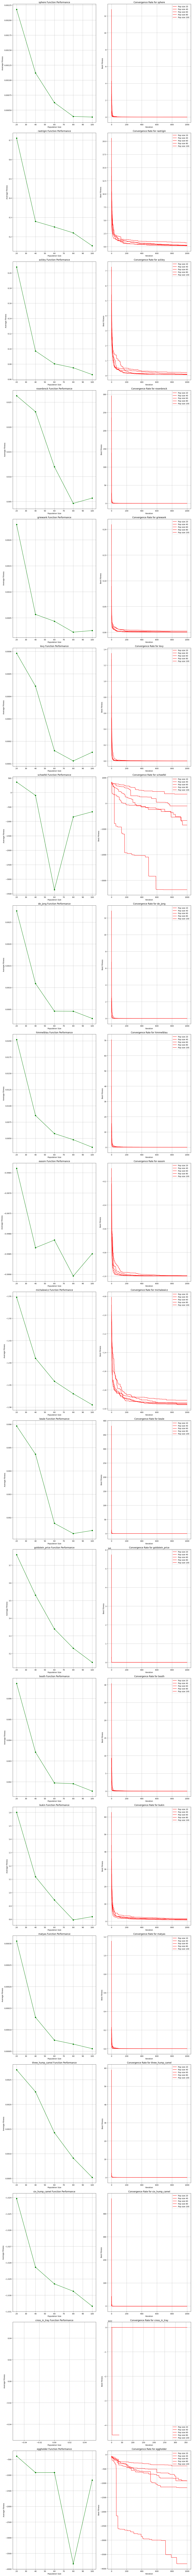

In [37]:

results, convergence_rates = run_benchmark_tests(benchmark_functions, population_sizes, num_runs, max_iter, pa)
print(f"Results for benchmark functions: {results}")
plot_results_and_convergence(results, convergence_rates, population_sizes)


In [ ]:
#Results for benchmark functions: {'sphere': [0.0029404315460188003, 0.001633927696705243, 0.0006856651980890811, 0.0005059596427182986, 0.00043009213807899553], 'rastrigin': [0.47159492862143254, 0.2758627220061175, 0.3203935973597282, 0.278407179007942, 0.08483170188624597], 'ackley': [0.15645319680107864, 0.10243858539962392, 0.07746856956909447, 0.08080526985052358, 0.06796946931526962], 'rosenbrock': [0.03512551888785522, 0.027976627841144873, 0.008174537542757524, 0.008102307961580705, 0.009955241954291918], 'griewank': [0.0011178899695237887, 0.0008533741318757615, 0.00030803087418111995, 0.0002409565768989097, 0.00023755779542881106], 'levy': [0.0006268616625428975, 0.00026449044063668923, 0.00011224192589938337, 0.0002161888999820324, 0.00010465041073704211], 'schwefel': [136.16858578350383, -342.4840809941817, -521.1236442712893, -323.27065751364825, -5500.2713049875265], 'de_jong': [0.0018234671510288215, 0.0004706118182279709, 0.0009591643151395313, 0.00048852607438743, 0.00022997731683606267], 'himmelblau': [0.015729540082115107, 0.01534923153754492, 0.014126664534414671, 0.005126797300210033, 0.0027768948438103257], 'easom': [-0.9955944473184243, -0.9950157590533888, -0.9989333756940892, -0.9987014883370764, -0.9987215837632928], 'michalewicz': [-1.9108830104324237, -1.9373456968594696, -1.9496134336661926, -1.937612387258581, -1.9465567253781297], 'beale': [0.008438263717538938, 0.002747980641013003, 0.0008995457069473876, 0.0010390911477729692, 0.0010406357786853203], 'goldstein_price': [3.622201240005746, 3.329673672433917, 3.411691550169828, 3.173180151525566, 3.1054296985672525], 'booth': [0.011917604152264533, 0.003689236079215312, 0.0026402280639380117, 0.0017343331353639427, 0.0014779817363986003], 'bukin': [1.5647744618729575, 1.110659651944115, 0.6354924750324301, 0.6120646757593672, 0.8890351879799528], 'matyas': [0.0004939300449745456, 5.609195625945464e-05, 8.968595174059563e-05, 6.164254406891975e-05, 4.149370358683864e-05], 'three_hump_camel': [0.0018482404457652937, 0.0020735463277446733, 0.0008770671881608869, 0.0010707279795938304, 0.000781216135986637], 'six_hump_camel': [-1.0275710788062242, -1.0271814858500363, -1.0285563467915952, -1.029958290857707, -1.0302949536398323], 'cross_in_tray': [-4664158502541703.0, -inf, -inf, -inf, -inf], 'eggholder': [-1048.949403709165, -824.0751351557046, -1097.6384663017434, -2459.615481984533, -1853.756434638509]}

In [19]:
# Cuckoo Search for TSP with Benchmark Functions
def cuckoo_search_tsp(cities, nests, fitness, n, max_iter, pa, benchmark_function, beta=1.5):
    num_cities = len(cities)

    # Subsample nests for the current population size
    current_nests = nests[:n]
    current_fitness = fitness[:n]

    # Find the best solution in the initial population
    best_nest_idx = current_fitness.argmin()
    best_nest = current_nests[best_nest_idx]
    best_fitness = current_fitness[best_nest_idx]

    for iter in range(max_iter):
        for i in range(n):
            new_nest = np.copy(nests[i])

            # Get a step size from Lévy flight
            step_size = levy_flight(beta)
            # Apply the step to a randomly chosen subset of the tour
            city_indices = np.sort(np.random.choice(num_cities, 2, replace=False))
            start, end = city_indices
            if (start + step_size) % num_cities < end:
                new_nest[start:end] = np.roll(new_nest[start:end], int(step_size))
            else:
                new_nest[end:(start + int(step_size)) % num_cities] = np.roll(new_nest[end:(start + int(step_size)) % num_cities], int(step_size))

            # Calculate the fitness of the new solution using the benchmark function
            fnew = benchmark_function([cities[idx] for idx in new_nest])

            # Greedily select the better solution
            if fnew < fitness[i]:
                nests[i] = new_nest
                fitness[i] = fnew

                # Update the best solution found so far
                if fnew < best_fitness:
                    best_nest = new_nest
                    best_fitness = fnew

        # Abandon a fraction (pa) of the worst nests
        for i in range(n):
            if np.random.rand() < pa:
                nests[i] = random_path(num_cities)  # Generate a new random solution for a nest
                fitness[i] = benchmark_function([cities[idx] for idx in nests[i]])  # Recalculate its fitness

    return best_nest, best_fitness

# Function to run each Benchmark Function with different population sizes
def run_cuckoo_search_with_benchmark(cities, population_sizes, max_iter, pa, benchmark_function, max_nests=100, num_runs=1):
    num_cities = len(cities)

    all_nests = [random_path(num_cities) for _ in range(max_nests)]
    all_fitness = np.array([benchmark_function([cities[idx] for idx in nest]) for nest in all_nests])

    avg_distances = []
    best_distances = []
    best_paths = []
    for n in population_sizes:
        distances = []
        for _ in range(num_runs):
            best_path, best_fitness = cuckoo_search_tsp(cities, all_nests, all_fitness, n, max_iter, pa, benchmark_function)
            distances.append(best_fitness)
            best_distances.append(best_fitness)

        best_paths.append(best_path)
        avg_distance = sum(distances) / len(distances)
        avg_distances.append(avg_distance)
        print(f"Population size: {n}, Average Distance: {avg_distance}")

    return best_distances, best_paths, avg_distances

# Function to run TSP with Benchmark functions
def run_tsp_with_benchmark(num_cities=100, population_sizes=[20, 40, 80, 100], max_iter=1000, pa=0.25, num_runs=1, benchmark_functions=[sphere]):
    for benchmark_function in benchmark_functions:
        print(f"Running Cuckoo Search with the {benchmark_function.__name__} Benchmark Function")
        all_avg_distances = []
        all_best_distances = []

        for _ in range(num_runs):
            cities = np.random.rand(num_cities, 2)
            plot_initial_tsp_graph(cities)
            best_distances, best_paths, avg_distances = run_cuckoo_search_with_benchmark(cities, population_sizes, max_iter, pa, benchmark_function, max(population_sizes), 1)

            all_avg_distances.append(avg_distances)
            all_best_distances.append(best_distances)

        # Compute the average over all runs for this benchmark function
        avg_of_avgs = np.mean(all_avg_distances, axis=0)
        avg_of_bests = np.mean(all_best_distances, axis=0)

        print(f"Averages for {benchmark_function.__name__}:")
        print(f"Average of Average Distances: {avg_of_avgs}")
        print(f"Average of Best Distances: {avg_of_bests}")
        print("")



# run_tsp_with_benchmark(benchmark_functions)


In [29]:
#Function to plot the initial configuration of the TSP
def plot_initial_tsp_graph(cities):
    plt.figure(figsize=(10, 6))
    plt.scatter(cities[:, 0], cities[:, 1], color='red')
    plt.title('Initial Traveling Salesman Problem Graph')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

#Function to generate a random path
def random_path(num_cities):
    return np.random.permutation(num_cities)

#Funtion to generate a random path but with same start city to reduce randomness for different population sizes
def random_path_with_fixed_start(num_cities, start_city=0): #replace random_path with this function to implement it
    path = np.random.permutation(num_cities)
    start_index = np.where(path == start_city)[0][0]
    path[0], path[start_index] = path[start_index], path[0]
    return path

#Function to calculate total distance of a path
def total_distance(cities, path):
    return sum(np.linalg.norm(cities[path[i]] - cities[path[(i + 1) % len(path)]]) for i in range(len(path)))

#Levy flight function (Mantegna's Algorithm) for TSP
def levy_flight(beta, size=1):
    #Calculation of sigma (standard deviation)
    sigma_u = (math.gamma(1 + beta) * math.sin(math.pi * beta / 2) /
               (math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
    sigma_v = 1

    u = np.random.normal(0, sigma_u, size)
    v = np.random.normal(0, sigma_v, size)
    step = u / np.fabs(v) ** (1 / beta)

    return step

#Cuckoo Search for TSP with simple Lévy flights
def cuckoo_search_tsp(cities, nests, fitness, n, max_iter, pa, beta=1.5):
    num_cities = len(cities)

    #Subsample nests for the current population size
    current_nests = nests[:n]
    current_fitness = fitness[:n]

    #Find the best solution in the initial population
    best_nest_idx = current_fitness.argmin()
    best_nest = current_nests[best_nest_idx]
    best_fitness = current_fitness[best_nest_idx]

    for iter in range(max_iter):
        for i in range(n):
            new_nest = np.copy(nests[i])

            #Get a step size from Lévy flight
            step_size = levy_flight(beta)
            #Apply the step to a randomly chosen subset of the tour
            city_indices = np.sort(np.random.choice(num_cities, 2, replace=False))
            start, end = city_indices
            if (start + step_size) % num_cities < end:
                new_nest[start:end] = np.roll(new_nest[start:end], int(step_size))
            else:
                new_nest[end:(start + int(step_size)) % num_cities] = np.roll(new_nest[end:(start + int(step_size)) % num_cities], int(step_size))

            #Calculate the fitness of the new solution
            fnew = total_distance(cities, new_nest)

            #Greedily select the better solution
            if fnew < fitness[i]:
                nests[i] = new_nest
                fitness[i] = fnew

                #Update the best solution found so far
                if fnew < best_fitness:
                    best_nest = new_nest
                    best_fitness = fnew

        #Abandon a fraction (pa) of the worst nests
        for i in range(n):
            if np.random.rand() < pa:
                nests[i] = random_path(num_cities)  #Generate a new random solution for a nest
                fitness[i] = total_distance(cities, nests[i])  #Recalculate its fitness

    return best_nest, best_fitness


#Function to run the Cuckoo Search algorithm for different population sizes
def run_cuckoo_search(cities, population_sizes, max_iter, pa, max_nests=100, num_runs=1):
    num_cities = len(cities)

    #Generate a large set of initial nests and fitnesses
    all_nests = [random_path(num_cities) for _ in range(max_nests)] #Initialize nests with random tours
    all_fitness = np.array([total_distance(cities, nest) for nest in all_nests])  #Fitness of each nest

    avg_distances = []
    best_distances = []
    best_paths = []
    #For each population size
    for n in population_sizes:
        distances = []
        for _ in range(num_runs):
            best_path, best_fitness = cuckoo_search_tsp(cities, all_nests, all_fitness, n, max_iter, pa) #Best path for each population
            distances.append(best_fitness)
            best_distances.append(best_fitness)
            best_paths.append(best_path)

        avg_distance = sum(distances) / len(distances)
        avg_distances.append(avg_distance)

        print(f"Population size: {n}, Average Fitness: {avg_distance} and Best Fitness: {best_fitness} for {n}")

    return best_distances, best_paths, avg_distances

#Function to find the best population size
def test_population_sizes(cities, population_sizes, max_iter, pa, best_distances, avg_distances):
    best_index = np.argmin(avg_distances)
    best_population_size = population_sizes[best_index]
    best_distance = best_distances[best_index]
    avg_distance = avg_distances[best_index]
    return best_population_size, best_distance, avg_distance

#Function to plot the effect of population size on the Cuckoo Search performance
def test_population_sizes_plot(population_sizes, best_distances):
    plt.figure(figsize=(10, 6))
    plt.plot(population_sizes, best_distances, marker='o')
    plt.title('Effect of Population Size on Cuckoo Search for TSP')
    plt.xlabel('Population Size')
    plt.ylabel('Best Distance Found')
    plt.grid(True)
    plt.show()


def plot_best_paths(cities, best_paths, best_index=None, plot_best_flag_only=True):
    num_paths = len(best_paths)
    #Generating a color map
    cmap = get_cmap('viridis', num_paths)

    #Filtering to only plot the best path if flag is set
    paths_to_plot = [best_paths[best_index]] if plot_best_flag_only and best_index is not None else best_paths

    for i, best_path in enumerate(paths_to_plot):
        plt.figure(figsize=(12, 8))
        plt.scatter(cities[:, 0], cities[:, 1], color='red', zorder=5)
        color = cmap(i)
        for j in range(len(best_path)):
            start_city = cities[best_path[j]]
            end_city = cities[best_path[(j + 1) % len(best_path)]]
            plt.plot([start_city[0], end_city[0]], [start_city[1], end_city[1]], color=color, zorder=1)
            #Annotating the city with the order number if not plotting the best path only
            plt.annotate(f'{j}', (start_city[0], start_city[1]), textcoords="offset points", xytext=(0,10), ha='center', zorder=10)

        plt.title('Best Path Found by Cuckoo Search' if plot_best_flag_only else 'Best Paths Found by Cuckoo Search for Different Population Sizes')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        plt.show()


In [30]:
num_cities = 100
max_iter = 1000
pa = 0.25
population_sizes = [20, 40, 80, 100]  # Different population sizes to test
cities = np.random.rand(num_cities, 2)

In [31]:
#Function to run with default parameters
def run_tsp(num_cities=100, population_sizes=[20, 40, 80, 100], cities=[], max_iter=1000, pa=0.25, num_runs=1):
  if len(cities)==0:
    cities = np.random.rand(num_cities, 2)

  #Plot the initial TSP graph
  plot_initial_tsp_graph(cities)

  #Run the Cuckoo Search algorithm for different population sizes
  best_distances, best_paths, avg_distances = run_cuckoo_search(cities, population_sizes, max_iter, pa, max(population_sizes), num_runs)

  #Find the best population size based on the average best distances obtained
  best_population_size, best_distance, avg_distance = test_population_sizes(cities, population_sizes, max_iter, pa, best_distances, avg_distances)
  print(f"The best population size is {best_population_size} with average distance: {avg_distances}.")

  #Plot the effect of population size on the Cuckoo Search performance
  test_population_sizes_plot(population_sizes, avg_distances)

  #Retrieve the best path for the best population size
  best_index = population_sizes.index(best_population_size)
  best_path = best_paths[best_index]

  #Space
  print("")

  #Plot best paths for each population size
  plot_best_paths(cities, best_paths, best_index)

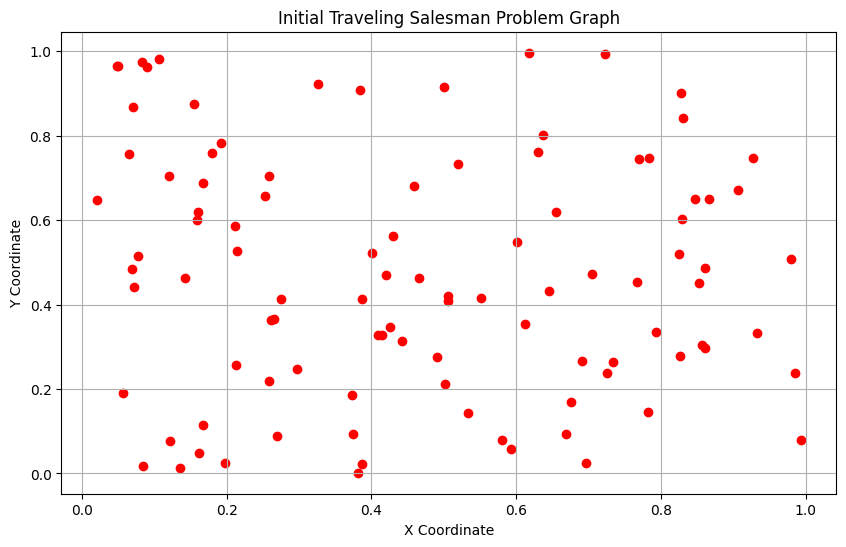

Population size: 20, Average Fitness: 43.47866425843817 and Best Fitness: 43.261578128246626 for 20
Population size: 40, Average Fitness: 42.94180651874116 and Best Fitness: 42.65366402902702 for 40
Population size: 80, Average Fitness: 42.751682251982935 and Best Fitness: 42.928182285632026 for 80
Population size: 100, Average Fitness: 42.694491272705214 and Best Fitness: 43.0194265378746 for 100
The best population size is 100 with average distance: [43.47866425843817, 42.94180651874116, 42.751682251982935, 42.694491272705214].


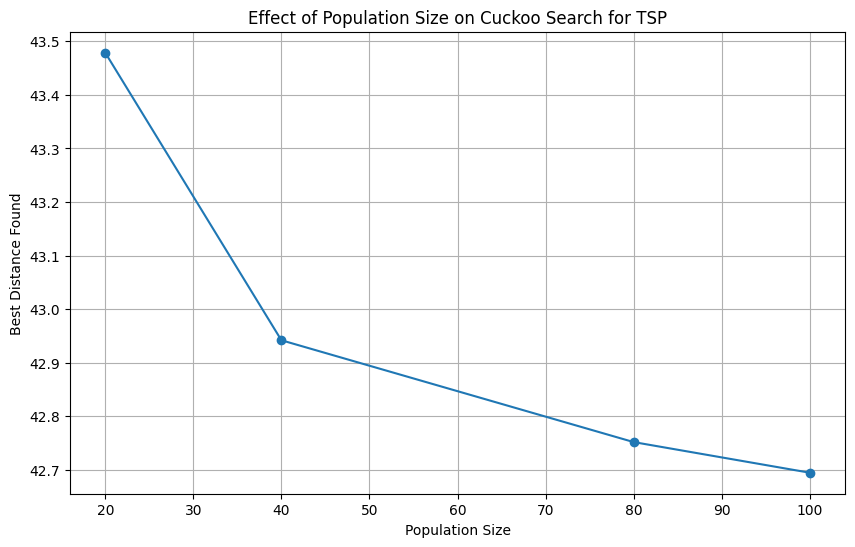

<ipython-input-29-8c1cddfd235c>:137: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis', num_paths)


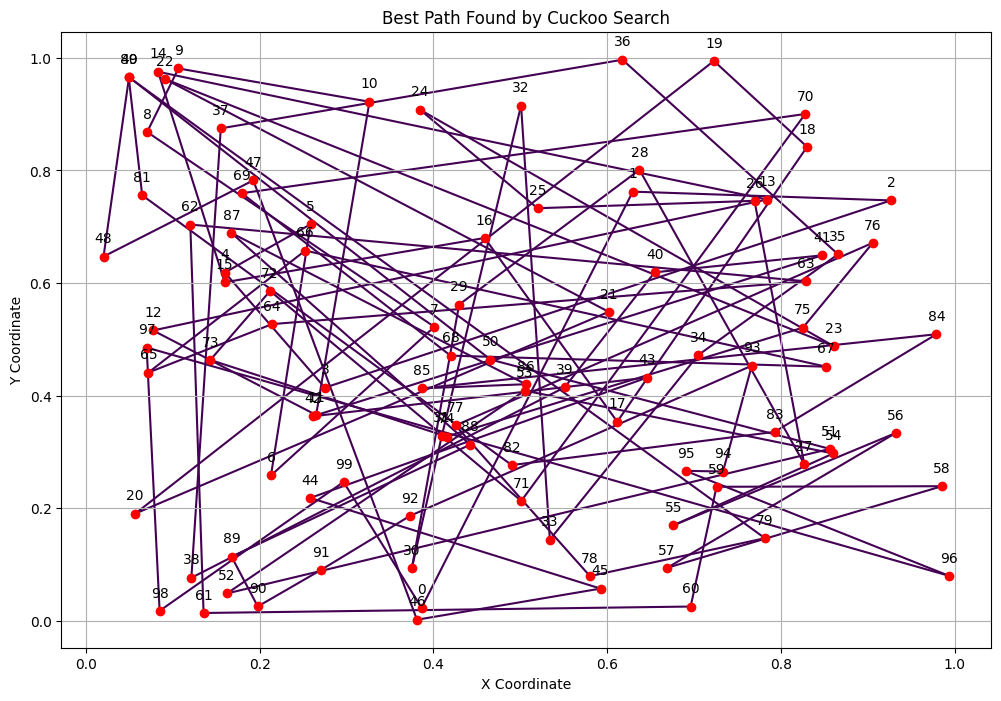

In [33]:
run_tsp(num_cities=100, population_sizes=[20, 40, 80, 100], cities=[], max_iter=1000, pa=0.25, num_runs=15)